In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=7dddec7149762010c0c064dd08ffd9e3226ba35fe7c824704d2ce2389235e2c4
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [5]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=221d34b4253e14eb09c9b83a2bff147aee6e117ffd354c1c52e1f4c222f5affc
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta

In [7]:
df = pd.read_csv('/kaggle/input/stock-data/AAPL.csv')
df.head()

,date,open,high,low,close,volume
0,2022-12-30 00:00:00.000000,128.410004,129.949997,127.430000,129.929993,77034200.0
1,2022-12-29 00:00:00.000000,127.989998,130.479996,127.730003,129.610001,75703700.0
2,2022-12-28 00:00:00.000000,129.669998,131.029999,125.870003,126.040001,85438400.0
3,2022-12-27 00:00:00.000000,131.380005,131.410004,128.720001,130.029999,69007800.0
4,2022-12-23 00:00:00.000000,130.919998,132.419998,129.639999,131.860001,63814900.0


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [9]:
df.head()

,date,open,high,low,close,volume
0,2022-12-30,128.410004,129.949997,127.430000,129.929993,77034200.0
1,2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700.0
2,2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400.0
3,2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800.0
4,2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900.0


In [10]:
df = df.sort_values(by='date')
df.head()

,date,open,high,low,close,volume
1258,2018-01-02,42.540001,43.075001,42.314999,43.064999,102223600.0
1257,2018-01-03,43.132500,43.637501,42.990002,43.057499,118071600.0
1256,2018-01-04,43.134998,43.367500,43.020000,43.257500,89738400.0
1255,2018-01-05,43.360001,43.842499,43.262501,43.750000,94640000.0
1254,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200.0


In [11]:
df.shape

(1259, 6)

In [12]:
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,date,open,high,low,close,volume
1254,2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900.0
1255,2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800.0
1256,2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400.0
1257,2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700.0
1258,2022-12-30,128.410004,129.949997,127.430000,129.929993,77034200.0


In [13]:
df["RSI"] = ta.rsi(df.close, length=16)
df["CCI"] = ta.cci(df.high, df.low, df.close, length=16)
df["AO"] = ta.ao(df.high, df.low)
df["MOM"] = ta.mom(df.close, length=16)
a = ta.macd(df.close)
df = df.join(a)
df["ATR"] = ta.atr(df.high, df.low, df.close, length=16)
df["BOP"] = ta.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = ta.rvi(df.close)
a = ta.dm(df.high, df.low, length=16)
df = df.join(a)
a = ta.stoch(df.high, df.low, df.close)
df = df.join(a)
a = ta.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = ta.willr(df.high, df.low, df.close, length=16)
#print(ta.macd(df.close))
#help(ta.mom)
#help(ta.cci)
# Get all candle patterns (This is the default behaviour)
#df1 = df.ta.cdl_pattern(name="all")
# Get only one pattern
#df = df.ta.cdl_pattern(name="doji")
# Get some patterns
#df = df.ta.cdl_pattern(name=["doji", "inside"])
#df

In [14]:
df.tail()

,date,open,high,low,close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
1254,2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900.0,36.937162,-108.736705,-10.543499,-16.449997,...,4.492249,0.338131,25.555768,0.967588,1.448820,16.161728,15.640634,19.652155,15.543532,-89.567663
1255,2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800.0,35.145153,-108.097009,-10.966470,-17.779999,...,4.407733,-0.501861,21.497524,0.907114,1.415769,9.403822,13.969094,8.477254,14.624666,-94.099109
1256,2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400.0,31.581767,-121.334903,-11.266646,-20.590004,...,4.454749,-0.703488,17.827097,0.850419,1.505408,5.929970,10.498507,3.966516,10.698642,-99.294613
1257,2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700.0,37.618190,-90.031965,-12.182087,-13.300003,...,4.453827,0.589094,31.284992,0.797268,1.411320,7.462915,7.598902,11.956632,8.133467,-84.481336
1258,2022-12-30,128.410004,129.949997,127.430000,129.929993,77034200.0,38.140006,-83.142467,-12.503764,-11.010010,...,4.332963,0.603171,41.961457,0.747439,1.341863,11.023494,8.138793,24.817302,13.580150,-83.153568


In [15]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

date                   0
open                   0
high                   0
low                    0
close                  0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [20]:
df['target'] = df['close']-df.open
df['target'] = df['target'].shift(-1)

df['target_class'] = np.where(df['target'] > 0, 1,0)

df['target_next_close'] = df['close'].shift(-1)
df.head(20)

,date,open,high,low,close,volume,RSI,CCI,AO,MOM,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,target,target_class,target_next_close
33,2018-02-20,43.012501,43.564999,42.855000,42.962502,135722000.0,55.079390,115.333815,-0.248221,0.085003,...,0.295578,0.316419,92.585331,86.851565,97.747230,94.837429,-12.082998,-0.439999,0,42.767502
34,2018-02-21,43.207500,43.529999,42.752499,42.767502,149886400.0,53.840908,100.650686,0.206904,0.777500,...,0.274788,0.301372,87.645762,89.917186,95.130542,97.382006,-15.256305,0.174999,1,43.125000
35,2018-02-22,42.950001,43.487499,42.927502,43.125000,123967600.0,55.785095,96.255793,0.591029,1.382500,...,0.255610,0.280339,87.740700,89.323931,94.910879,95.929551,-9.438597,0.457500,1,43.875000
36,2018-02-23,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,2.017502,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,0.654999,1,44.742500
37,2018-02-26,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,2.797501,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,-0.177502,0,44.597500
38,2018-02-27,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,4.472500,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,-0.285000,0,44.529999
39,2018-02-28,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,5.407497,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,-0.884998,0,43.750000
40,2018-03-01,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,2.992500,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,0.852501,1,44.052502
41,2018-03-02,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,4.167503,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,0.402500,1,44.205002
42,2018-03-05,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,5.417503,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,-0.310001,0,44.167500


In [21]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.head(20)

,index,date,open,high,low,close,volume,RSI,CCI,AO,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,target,target_class,target_next_close
0,33,2018-02-20,43.012501,43.564999,42.855000,42.962502,135722000.0,55.079390,115.333815,-0.248221,...,0.295578,0.316419,92.585331,86.851565,97.747230,94.837429,-12.082998,-0.439999,0,42.767502
1,34,2018-02-21,43.207500,43.529999,42.752499,42.767502,149886400.0,53.840908,100.650686,0.206904,...,0.274788,0.301372,87.645762,89.917186,95.130542,97.382006,-15.256305,0.174999,1,43.125000
2,35,2018-02-22,42.950001,43.487499,42.927502,43.125000,123967600.0,55.785095,96.255793,0.591029,...,0.255610,0.280339,87.740700,89.323931,94.910879,95.929551,-9.438597,0.457500,1,43.875000
3,36,2018-02-23,43.417500,43.912498,43.384998,43.875000,135249600.0,59.593541,108.381565,0.755147,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,0.654999,1,44.742500
4,37,2018-02-26,44.087502,44.847500,44.052502,44.742500,152648800.0,63.475092,124.071017,0.953999,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,-0.177502,0,44.597500
5,38,2018-02-27,44.775002,45.119999,44.540001,44.597500,155712400.0,62.406256,112.052327,1.244544,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,-0.285000,0,44.529999
6,39,2018-02-28,44.814999,45.154999,44.512501,44.529999,151128400.0,61.888781,98.700140,1.545544,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,-0.884998,0,43.750000
7,40,2018-03-01,44.634998,44.945000,43.165001,43.750000,195208000.0,56.149955,62.574562,1.696147,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,0.852501,1,44.052502
8,41,2018-03-02,43.200001,44.075001,43.112499,44.052502,153816000.0,57.769884,49.498274,1.689669,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,0.402500,1,44.205002
9,42,2018-03-05,43.802502,44.435001,43.630001,44.205002,113605600.0,58.592461,62.043787,1.608927,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,-0.310001,0,44.167500


In [25]:
df.drop('index',axis=1,inplace=True)
df.tail()

,date,open,high,low,close,RSI,CCI,AO,MOM,MACD_12_26_9,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,target,target_class,target_next_close
1220,2022-12-22,134.350006,134.559998,130.300003,132.229996,37.297634,-114.623600,-9.831941,-15.800003,-3.464708,...,1.032094,1.501408,16.341731,12.626107,15.744589,8.992813,-88.873055,0.940002,1,131.860001
1221,2022-12-23,130.919998,132.419998,129.639999,131.860001,36.937162,-108.736705,-10.543499,-16.449997,-3.670694,...,0.967588,1.448820,16.161728,15.640634,19.652155,15.543532,-89.567663,-1.350006,0,130.029999
1222,2022-12-27,131.380005,131.410004,128.720001,130.029999,35.145153,-108.097009,-10.966470,-17.779999,-3.936230,...,0.907114,1.415769,9.403822,13.969094,8.477254,14.624666,-94.099109,-3.629997,0,126.040001
1223,2022-12-28,129.669998,131.029999,125.870003,126.040001,31.581767,-121.334903,-11.266646,-20.590004,-4.417705,...,0.850419,1.505408,5.929970,10.498507,3.966516,10.698642,-99.294613,1.620003,1,129.610001
1224,2022-12-29,127.989998,130.479996,127.730003,129.610001,37.618190,-90.031965,-12.182087,-13.300003,-4.459798,...,0.797268,1.411320,7.462915,7.598902,11.956632,8.133467,-84.481336,1.519989,1,129.929993


In [26]:
df.drop('date',axis=1,inplace=True)

In [27]:
df.head(10)

,open,high,low,close,RSI,CCI,AO,MOM,MACD_12_26_9,MACDh_12_26_9,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,target,target_class,target_next_close
0,43.012501,43.564999,42.855000,42.962502,55.079390,115.333815,-0.248221,0.085003,-0.526813,0.674631,...,0.295578,0.316419,92.585331,86.851565,97.747230,94.837429,-12.082998,-0.439999,0,42.767502
1,43.207500,43.529999,42.752499,42.767502,53.840908,100.650686,0.206904,0.777500,-0.409435,0.633607,...,0.274788,0.301372,87.645762,89.917186,95.130542,97.382006,-15.256305,0.174999,1,43.125000
2,42.950001,43.487499,42.927502,43.125000,55.785095,96.255793,0.591029,1.382500,-0.284289,0.607002,...,0.255610,0.280339,87.740700,89.323931,94.910879,95.929551,-9.438597,0.457500,1,43.875000
3,43.417500,43.912498,43.384998,43.875000,59.593541,108.381565,0.755147,2.017502,-0.123171,0.614496,...,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,0.654999,1,44.742500
4,44.087502,44.847500,44.052502,44.742500,63.475092,124.071017,0.953999,2.797501,0.073667,0.649068,...,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,-0.177502,0,44.597500
5,44.775002,45.119999,44.540001,44.597500,62.406256,112.052327,1.244544,4.472500,0.215479,0.632703,...,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,-0.285000,0,44.529999
6,44.814999,45.154999,44.512501,44.529999,61.888781,98.700140,1.545544,5.407497,0.318744,0.588775,...,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,-0.884998,0,43.750000
7,44.634998,44.945000,43.165001,43.750000,56.149955,62.574562,1.696147,2.992500,0.333796,0.483061,...,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,0.852501,1,44.052502
8,43.200001,44.075001,43.112499,44.052502,57.769884,49.498274,1.689669,4.167503,0.365915,0.412145,...,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,0.402500,1,44.205002
9,43.802502,44.435001,43.630001,44.205002,58.592461,62.043787,1.608927,5.417503,0.399076,0.356244,...,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,-0.310001,0,44.167500


In [28]:
data_set = df.iloc[:, 0:24]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,open,high,low,close,RSI,CCI,AO,MOM,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,target,target_class,target_next_close
0,43.012501,43.564999,42.855000,42.962502,55.079390,115.333815,-0.248221,0.085003,-0.526813,0.674631,-1.201444,1.092941,-0.070422,49.027023,0.295578,0.316419,92.585331,86.851565,97.747230,94.837429,-12.082998,-0.439999,0,42.767502
1,43.207500,43.529999,42.752499,42.767502,53.840908,100.650686,0.206904,0.777500,-0.409435,0.633607,-1.043042,1.070754,-0.565915,41.674550,0.274788,0.301372,87.645762,89.917186,95.130542,97.382006,-15.256305,0.174999,1,43.125000
2,42.950001,43.487499,42.927502,43.125000,55.785095,96.255793,0.591029,1.382500,-0.284289,0.607002,-0.891291,1.046274,0.312500,50.641507,0.255610,0.280339,87.740700,89.323931,94.910879,95.929551,-9.438597,0.457500,1,43.875000
3,43.417500,43.912498,43.384998,43.875000,59.593541,108.381565,0.755147,2.017502,-0.123171,0.614496,-0.737667,1.028345,0.867299,58.513532,0.267346,0.260915,91.571601,88.986021,96.431894,95.491105,-0.590295,0.654999,1,44.742500
4,44.087502,44.847500,44.052502,44.742500,63.475092,124.071017,0.953999,2.797501,0.073667,0.649068,-0.575400,1.024501,0.823900,65.166734,0.313294,0.242960,96.176764,91.829688,99.048582,96.797118,-1.440817,-0.177502,0,44.597500
5,44.775002,45.119999,44.540001,44.597500,62.406256,112.052327,1.244544,4.472500,0.215479,0.632703,-0.417224,0.994103,-0.306038,54.492347,0.310504,0.226344,97.019174,94.922513,99.174987,98.218488,-6.911366,-0.285000,0,44.529999
6,44.814999,45.154999,44.512501,44.529999,61.888781,98.700140,1.545544,5.407497,0.318744,0.588775,-0.270031,0.970199,-0.443581,45.891092,0.291773,0.210956,94.472905,95.889614,97.584460,98.602676,-8.229101,-0.884998,0,43.750000
7,44.634998,44.945000,43.165001,43.750000,56.149955,62.574562,1.696147,2.992500,0.333796,0.483061,-0.149265,1.024954,-0.497190,39.757627,0.272045,0.287804,88.786844,93.426308,90.230555,95.663334,-18.499003,0.852501,1,44.052502
8,43.200001,44.075001,43.112499,44.052502,57.769884,49.498274,1.689669,4.167503,0.365915,0.412145,-0.046229,1.020753,0.885714,46.158493,0.253744,0.271975,84.729766,89.329838,85.282463,91.032492,-14.516096,0.402500,1,44.205002
9,43.802502,44.435001,43.630001,44.205002,58.592461,62.043787,1.608927,5.417503,0.399076,0.356244,0.042832,1.006308,0.500000,51.188247,0.260858,0.253766,80.795612,84.770741,81.472480,85.661833,-12.508193,-0.310001,0,44.167500


In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.04785693 0.04869974 0.05121153 ... 0.38515088 0.         0.04929591]
 [0.04918676 0.04846084 0.05049783 ... 0.42082359 1.         0.05173679]
 [0.04743071 0.04817077 0.05171635 ... 0.43720997 1.         0.05685756]
 ...
 [0.65049273 0.64828341 0.64907398 ... 0.20011621 0.         0.61785443]
 [0.63883108 0.64568969 0.62922995 ... 0.50464048 1.         0.64222927]
 [0.62737406 0.64193566 0.6421808  ... 0.49883922 1.         0.64441407]]


In [30]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(21):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1225
[[[0.04785693 0.04869974 0.05121153 ... 0.9774723  0.94837429 0.87942783]
  [0.04918676 0.04846084 0.05049783 ... 0.95130542 0.97382006 0.84768546]
  [0.04743071 0.04817077 0.05171635 ... 0.94910879 0.95929551 0.9058796 ]
  ...
  [0.04062809 0.04441676 0.04334354 ... 0.26987985 0.28560557 0.15306194]
  [0.03863335 0.03962187 0.03911364 ... 0.25564197 0.28541398 0.11616604]
  [0.04033826 0.03929766 0.03982733 ... 0.29654456 0.27402213 0.20605086]]

 [[0.04918676 0.04846084 0.05049783 ... 0.95130542 0.97382006 0.84768546]
  [0.04743071 0.04817077 0.05171635 ... 0.94910879 0.95929551 0.9058796 ]
  [0.05061889 0.05107159 0.05490181 ... 0.96431894 0.95491105 0.99438857]
  ...
  [0.03863335 0.03962187 0.03911364 ... 0.25564197 0.28541398 0.11616604]
  [0.04033826 0.03929766 0.03982733 ... 0.29654456 0.27402213 0.20605086]
  [0.03563271 0.04486041 0.03963585 ... 0.39567017 0.31595223 0.37530708]]

 [[0.04743071 0.04817077 0.05171635 ... 0.94910879 0.95929551 0.9058796 ]
  [0.05061889 0.0

In [32]:
X.shape

(1195, 30, 21)

In [34]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

956
(956, 30, 21)
(239, 30, 21)
(956, 1)
(239, 1)


In [35]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 21), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

2024-02-06 15:39:52.977875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 15:39:52.978043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 15:39:53.166072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/30
58/58 [==============================] - 4s 37ms/step - loss: 0.0207 - val_loss: 0.0029
Epoch 2/30
58/58 [==============================] - 2s 29ms/step - loss: 5.9047e-04 - val_loss: 6.9805e-04
Epoch 3/30
58/58 [==============================] - 2s 29ms/step - loss: 4.9038e-04 - val_loss: 6.5514e-04
Epoch 4/30
58/58 [==============================] - 2s 27ms/step - loss: 3.7148e-04 - val_loss: 0.0012
Epoch 5/30
58/58 [==============================] - 2s 26ms/step - loss: 3.7404e-04 - val_loss: 6.4463e-04
Epoch 6/30
58/58 [==============================] - 1s 26ms/step - loss: 3.8318e-04 - val_loss: 6.2970e-04
Epoch 7/30
58/58 [==============================] - 2s 26ms/step - loss: 3.2882e-04 - val_loss: 7.0719e-04
Epoch 8/30
58/58 [==============================] - 2s 28ms/step - loss: 3.3798e-04 - val_loss: 6.9725e-04
Epoch 9/30
58/58 [==============================] - 2s 28ms/step - loss: 3.3700e-04 - val_loss: 0.0014
Epoch 10/30
58/58 [==============================] - 

In [36]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

8/8 [==============================] - 1s 15ms/step
[0.90471226] [0.88051549]
[0.8884189] [0.86617741]
[0.87948537] [0.86078348]
[0.8662843] [0.84822056]
[0.85360706] [0.84760609]
[0.84374636] [0.84439707]
[0.8353884] [0.92025267]
[0.8315212] [0.95063586]
[0.87144804] [0.94947516]
[0.8977061] [0.95787319]


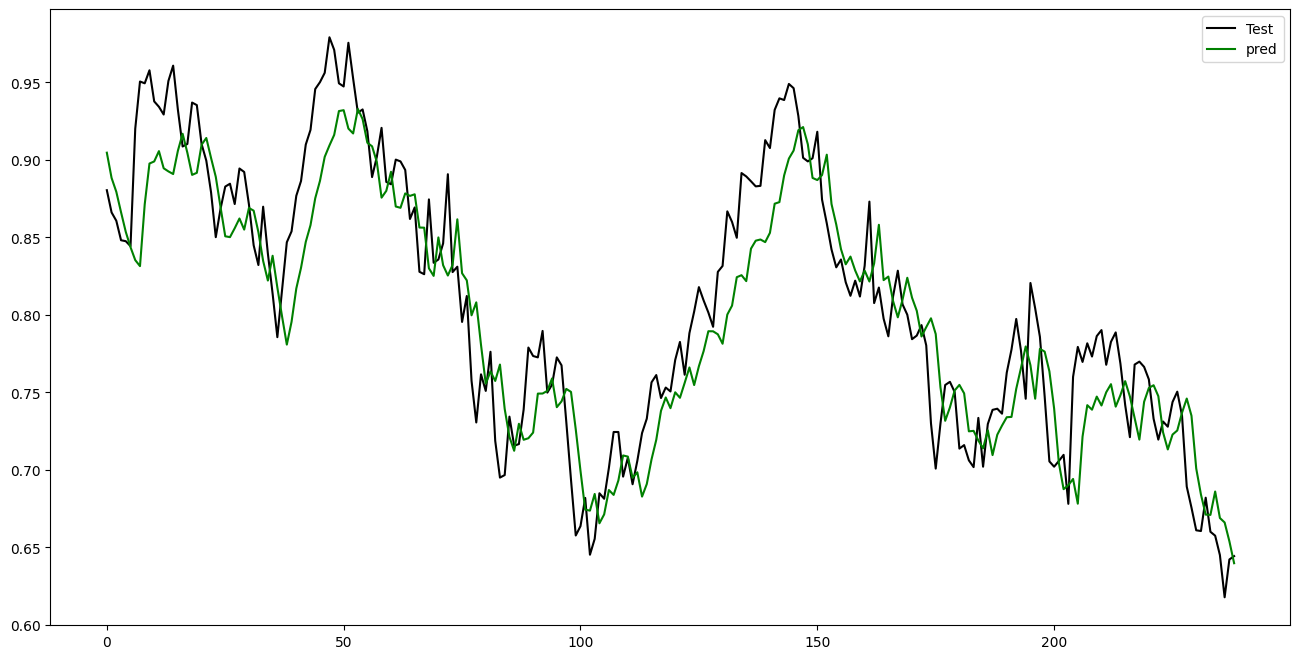

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()